Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Parsed with column specification:
cols(
  Month = col_date(format = ""),
  FRED_Full_Market_Sales = col_double(),
  Indv_Fashion_Store_Sales = col_double()
)



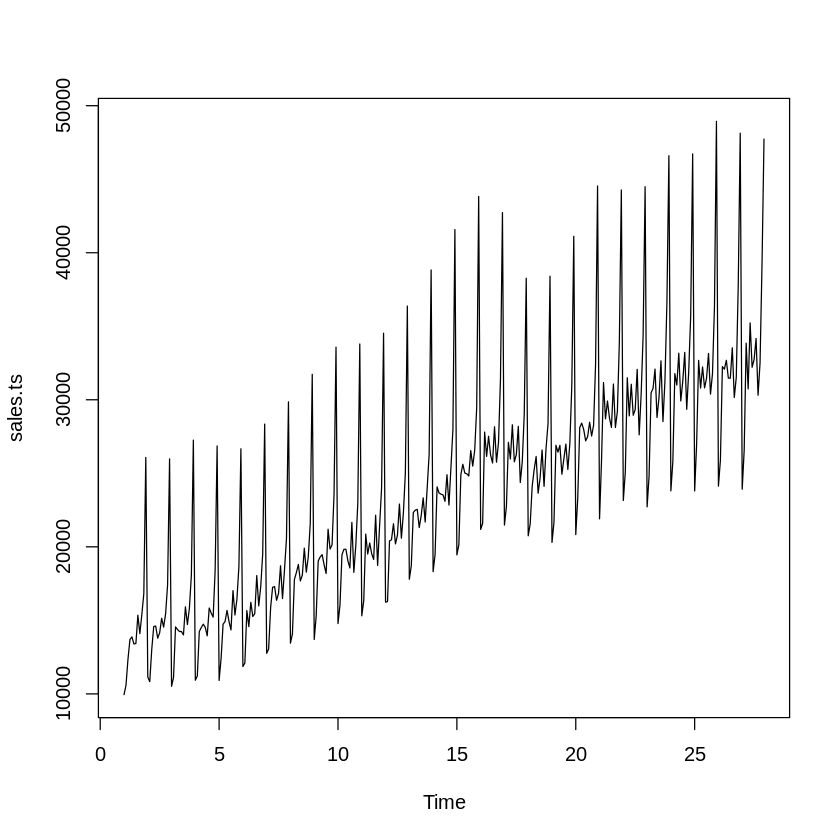

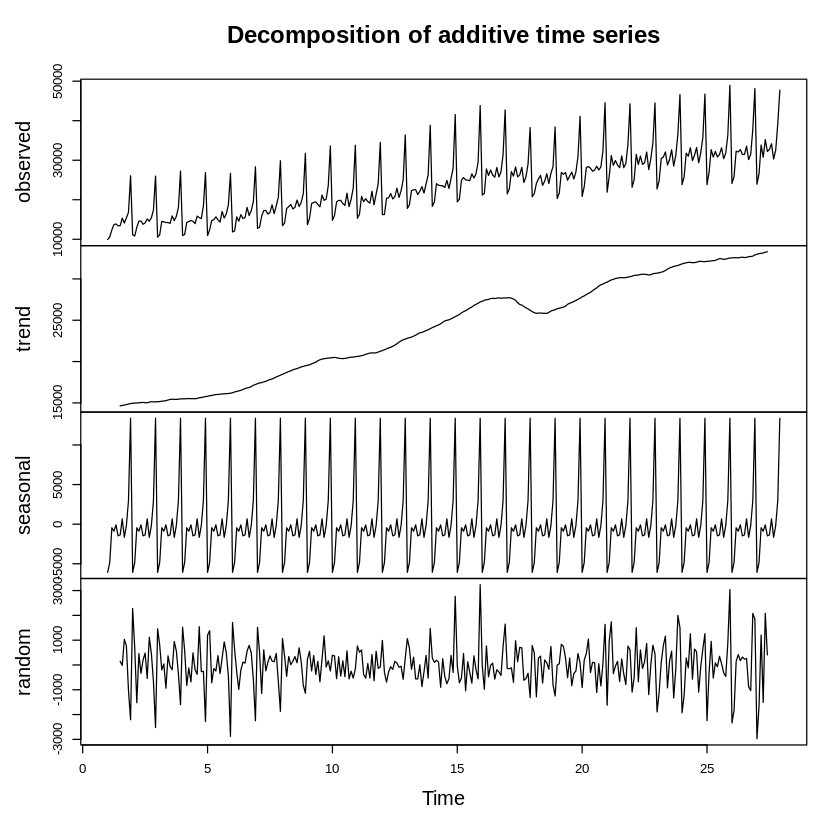

In [1]:


library("domojupyter")
library("forecast")
sales <-  read_dataframe("DP 2021 | Forecast Demo | Input", query = "SELECT * FROM table")
sales.ts <- ts(sales$Indv_Fashion_Store_Sales, start=c(1,1), end=c(27,12), frequency=12)

# Automate dates
plot(sales.ts)
plot(decompose(sales.ts))

In [2]:
# Use auto.arima to determine which parameters to use
    # for your forecasting model.

auto.arima(sales.ts)

Series: sales.ts 
ARIMA(3,0,2)(0,1,2)[12] with drift 

Coefficients:
         ar1     ar2     ar3      ma1      ma2     sma1     sma2    drift
      0.2292  0.3881  0.2693  -0.0839  -0.2406  -0.2765  -0.2439  60.9866
s.e.  0.1677  0.1475  0.0724   0.1689   0.1243   0.0600   0.0594  10.0109

sigma^2 estimated as 548024:  log likelihood=-2501.94
AIC=5021.87   AICc=5022.47   BIC=5055.56

       Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 28       25011.97 24063.25 25960.68 23561.03 26462.90
Feb 28       27882.82 26924.14 28841.50 26416.64 29349.00
Mar 28       34335.23 33361.33 35309.13 32845.78 35824.68
Apr 28       31887.02 30852.70 32921.34 30305.16 33468.88
May 28       35527.43 34476.95 36577.91 33920.86 37134.00
Jun 28       32760.31 31686.32 33834.29 31117.79 34402.82
Jul 28       33414.70 32319.16 34510.24 31739.21 35090.19
Aug 28       34982.10 33870.93 36093.27 33282.71 36681.49
Sep 28       31345.41 30218.66 32472.15 29622.20 33068.62
Oct 28       33459.53 32319.56 34599.50 31716.10 35202.97
Nov 28       39481.14 38329.70 40632.59 37720.16 41242.13
Dec 28       48903.08 47741.30 50064.86 47126.28 50679.87
Jan 29       26017.89 24589.28 27446.49 23833.02 28202.75
Feb 29       28640.98 27192.90 30089.06 26426.33 30855.62
Mar 29       34927.65 33457.57 36397.73 32679.36 37175.94
Apr 29       33099.39 31582.52 34616.26 30779.53 35419.24
May 29       3

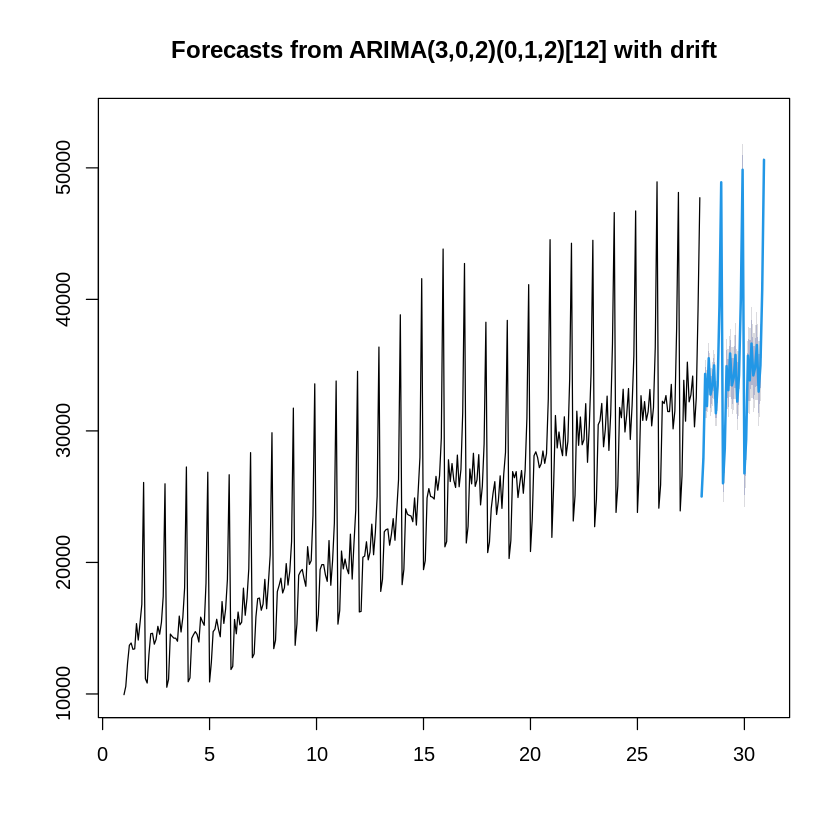

In [3]:
# Using parameters from auto.arima, fit a forecasting model and
    # use that model to forecast sales for the next 36 months.
fit.sales <- Arima(sales.ts, order=c(3,0,2), seasonal=list(order=c(0,1,2), period=12), include.drift=TRUE)
months.to.forecast <- 36
sales.forecast <- forecast(fit.sales, h=months.to.forecast)
plot(sales.forecast)
sales.forecast

In [4]:
# Format output from the forecasting model to match that of
    # the historical data in order to create an output table
    # that will build a Forecast Card in Domo.

forecast.year <- as.integer(substr(rownames(as.data.frame(sales.forecast)),5,6))
forecast.month <- rep(1:12, months.to.forecast/12)
forecast.actual.sales <- as.numeric(rep(NA, months.to.forecast))
sales.forecast.df <- data.frame(forecast.year, forecast.month, forecast.actual.sales, as.numeric(sales.forecast$mean), sales.forecast$lower, sales.forecast$upper)
names(sales.forecast.df) <- c('f.year', 'f.month','Sales', 'Forecasted_Sales', '80pct_Lwr_Bnd', '95pct_Lwr_Bnd', '80pct_Upr_Bnd', '95pct_Upr_Bnd')
sales.forecast.df

f.year,f.month,Sales,Forecasted_Sales,80pct_Lwr_Bnd,95pct_Lwr_Bnd,80pct_Upr_Bnd,95pct_Upr_Bnd
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
28,1,NA,25011.97,24063.25,23561.03,25960.68,26462.90
28,2,NA,27882.82,26924.14,26416.64,28841.50,29349.00
28,3,NA,34335.23,33361.33,32845.78,35309.13,35824.68
28,4,NA,31887.02,30852.70,30305.16,32921.34,33468.88
28,5,NA,35527.43,34476.95,33920.86,36577.91,37134.00
28,6,NA,32760.31,31686.32,31117.79,33834.29,34402.82
28,7,NA,33414.70,32319.16,31739.21,34510.24,35090.19
28,8,NA,34982.10,33870.93,33282.71,36093.27,36681.49
28,9,NA,31345.41,30218.66,29622.20,32472.15,33068.62
